<a href="https://colab.research.google.com/github/cmolinara-eng/Transferencia-de-Calor-con-Python-y-Matlab/blob/main/Conducci%C3%B3n_Trasiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conducción Trasiente

## Ejemplo 6.1.

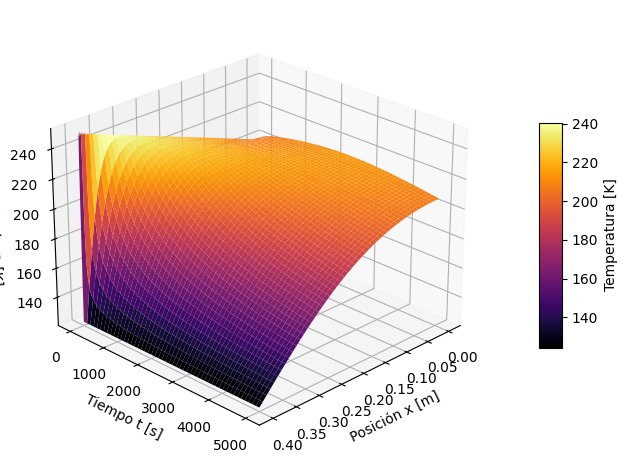

In [ ]:

# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt


# ----------------------------------------------------------
# Parámetros  físicos
# ----------------------------------------------------------
k = 15         # [W/m-K]
rho = 7000     # [kg/m^3]
cp = 500       # [J/kg-K]
alpha = k / (rho * cp)

L = 0.4        # [m]
T1 = 200       # [K]
Ts = 250       # [K]
T2 = 123       # [K]

N_terms = 250

# ----------------------------------------------------------
# Definicion de funciones
# ----------------------------------------------------------
def A_n(n, T1, Ts, T2):
    term1 = (4/np.pi) * (Ts - T2) * ((-1)**(n-1)) / (2*n - 1)
    term2 = (8 * (Ts - T1)) / ((2*n - 1)**2 * np.pi**2)
    return term1 - term2

# Valores propios lambda_n
def lambda_n(n, L):
    return (2*n - 1) * np.pi / (2*L)

# Perfil de temperatura
def T_xt(x, t, N_terms=50):
    theta = np.zeros_like(x, dtype=float)
    for n in range(1, N_terms+1):
        An = A_n(n, T1, Ts, T2)
        lam = lambda_n(n, L)
        theta += An * np.cos(lam * x) * np.exp(-lam**2 * alpha * t)
    return theta + T2

# ----------------------------------------------------------
# Gráfica de superficie
# ----------------------------------------------------------
x = np.linspace(0, L, 600)             # posiciones
t = np.linspace(0.1, 5000, 700)          # tiempos

X, T = np.meshgrid(x, t)
Z = np.zeros_like(X)

for i in range(len(t)):
    Z[i,:] = T_xt(x, t[i], N_terms=N_terms) # Evaluación de tiempo y posición


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, Z, cmap='inferno', edgecolor='none', antialiased=True)
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('Temperatura [K]')

ax.set_xlabel("Posición x [m]")
ax.set_ylabel("Tiempo t [s]")
ax.set_zlabel("Temperatura [K]")

ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()




## Ejemplo 6.2.

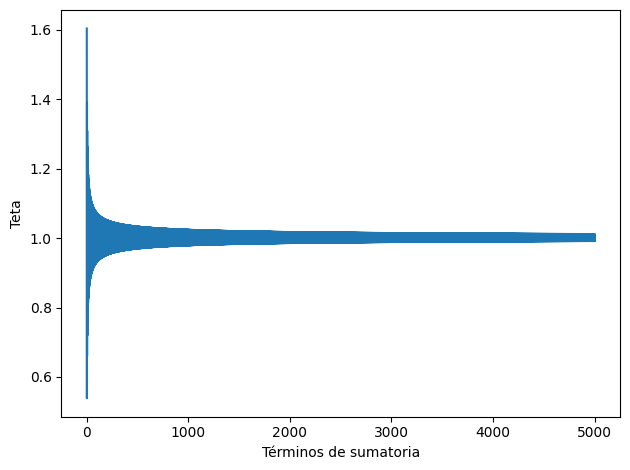

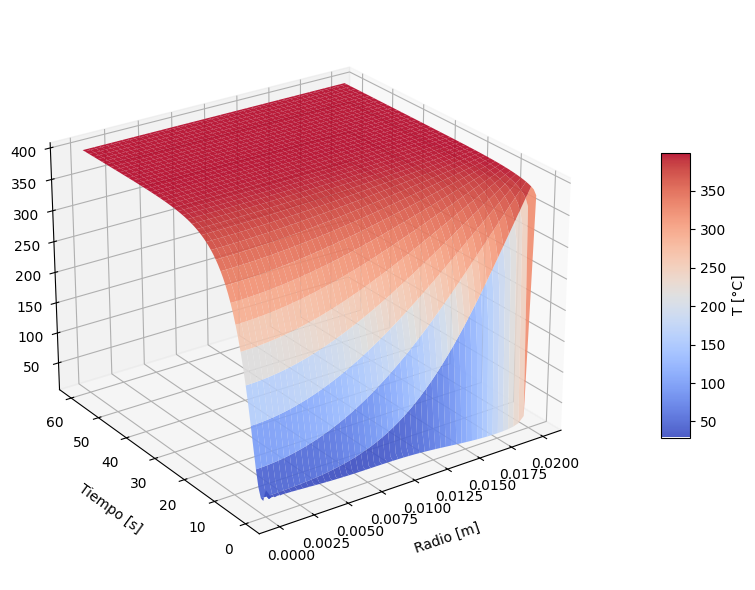

In [ ]:

# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv  # jv(n,x) = Bessel función de primer tipo de orden n
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------------------------
# Parámetros
# ----------------------------------------------------------
Ts = 400          # Temperatura superficial [°C]
T0 = 30           # Temperatura inicial [°C]
k = 50            # Conductividad térmica [W/m·K]
Den = 7980        # Densidad [kg/m³]
Cp = 510          # Calor específico [J/kg·K]
R = 0.02          # Radio [m]

dif = k / (Den * Cp)  # Difusividad térmica [m²/s]


# ----------------------------------------------------------
# Convergencia en el centro
# ----------------------------------------------------------
r = 0
tiempo = 0
n = 5000
f = np.arange(1, n + 1)
Tet = 0.0
Val = np.zeros(n)

for j in range(1, n + 1):
    Lam1 = (4 * j - 1) * (np.pi / 4) / R
    dTet = (2 / R) * (jv(0, Lam1 * r) * np.exp(-dif * Lam1**2 * tiempo)) / (Lam1 * jv(1, Lam1 * R))
    Tet = Tet + dTet
    Val[j - 1] = Tet

Temp = Ts + Tet * (T0 - Ts)


# ----------------------------------------------------------
# Gráfico
# ----------------------------------------------------------
plt.figure(1)
plt.plot(f, Val)
plt.xlabel('Términos de sumatoria')
plt.ylabel('Teta')
#plt.title('Convergencia de la serie en el centro')
plt.grid(False)
plt.tight_layout()
plt.show()




# ----------------------------------------------------------
# Superficie
# ----------------------------------------------------------
n = 200
nt = 60
nr = 50
t = np.linspace(0, nt, 80)
r = np.linspace(0, R, nr)


Rm, Tm = np.meshgrid(r, t)
Temp_mat = np.zeros_like(Rm)


# ----------------------------------------------------------
# Serie
# ----------------------------------------------------------
for it in range(len(t)):
    for ir in range(len(r)):
        Tet = 0.0
        for j in range(1, n + 1):
            Lam1 = (4 * j - 1) * (np.pi / 4) / R
            dTet = (2 / R) * (jv(0, Lam1 * r[ir]) * np.exp(-dif * Lam1**2 * t[it])) / (Lam1 * jv(1, Lam1 * R))
            Tet = Tet + dTet
        Temp_mat[it, ir] = Ts + Tet * (T0 - Ts)


# ----------------------------------------------------------
# Superficie de T
# ----------------------------------------------------------


fig = plt.figure(2, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Rm, Tm, Temp_mat, cmap='coolwarm',
                       antialiased=True, alpha=0.9, edgecolor='none')

ax.set_xlabel('Radio [m]', labelpad=10)
ax.set_ylabel('Tiempo [s]', labelpad=10)
ax.set_zlabel('Temperatura [°C]', labelpad=10)

ax.view_init(elev=25, azim=-125)

cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.1)
cbar.set_label('T [°C]')
plt.tight_layout()
plt.show()

## Ejemplo 6.3.

Bi = 5.1282e-04
tau = 200.00 s (3.33 min)
Tiempo para alcanzar 130.0 °C: t = 331.65 s (5.53 min)


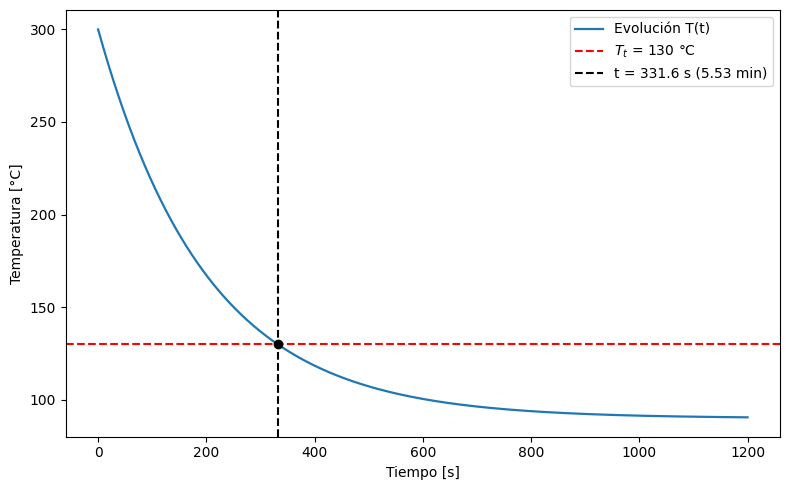

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
#  Datos del problema
# ----------------------------------------------------------
d = 0.02       # [m]
k = 195        # [W/(m K)]
h = 30         # [W/(m^2 K)]
rho = 2000     # [kg/m^3]
cp = 0.9e3     # [J/(kg·K)]
T0 = 300       # [°C]  (inicial)
Tinf = 90      # [°C]  (ambiente)
Tt = 130       # [°C]  (temperatura objetivo)

# ----------------------------------------------------------
# Geometría y propiedades derivadas
# ----------------------------------------------------------
Lc = d / 6                          # longitud característica para esfera (V/A)
V = np.pi * d**3 / 6                # volumen de la esfera
A = np.pi * d**2                    # área superficial de la esfera
m = rho * V                         # masa de la esfera

# ----------------------------------------------------------
# Cálculos
# ----------------------------------------------------------
Bi = h * Lc / k                     # número de Biot
tau = m * cp / (h * A)              # constante de tiempo [s]
t_req = -tau * np.log((Tt - Tinf) / (T0 - Tinf))   # tiempo para alcanzar Tt [s]

# ----------------------------------------------------------
#  resultados numéricos
# ----------------------------------------------------------
print(f"Bi = {Bi:.4e}")
print(f"tau = {tau:.2f} s ({tau/60:.2f} min)")
print(f"Tiempo para alcanzar {Tt:.1f} °C: t = {t_req:.2f} s ({t_req/60:.2f} min)")

# ----------------------------------------------------------
# Evolución temporal de la temperatura
# ----------------------------------------------------------
tmax = max(1.5 * t_req, 1200)
tvec = np.linspace(0, tmax, 500)     # vector de tiempos
Tvec = Tinf + (T0 - Tinf) * np.exp(-tvec / tau)   # solución analítica

# ----------------------------------------------------------
# Gráfica
# ----------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(tvec, Tvec, linewidth=1.6, label='Evolución T(t)')
plt.axhline(Tt, color='r', linestyle='--',label=f'$T_t$ = {Tt:.0f} °C')
plt.axvline(t_req, color='k', linestyle='--',label=f't = {t_req:.1f} s ({t_req/60:.2f} min)')
plt.plot(t_req, Tt, 'ok', markerfacecolor='k')

plt.xlabel('Tiempo [s]')
plt.ylabel('Temperatura [°C]')
#plt.title('Enfriamiento transitorio de una esfera')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()






## Ejemplo 6.4.

Ts en 20 min (M 1): 27.36 °C
Ts en 20 min (M 2): 21.52 °C
Ts en 20 min (M 3): 24.64 °C
Ts en 20 min (M 4): 20.90 °C


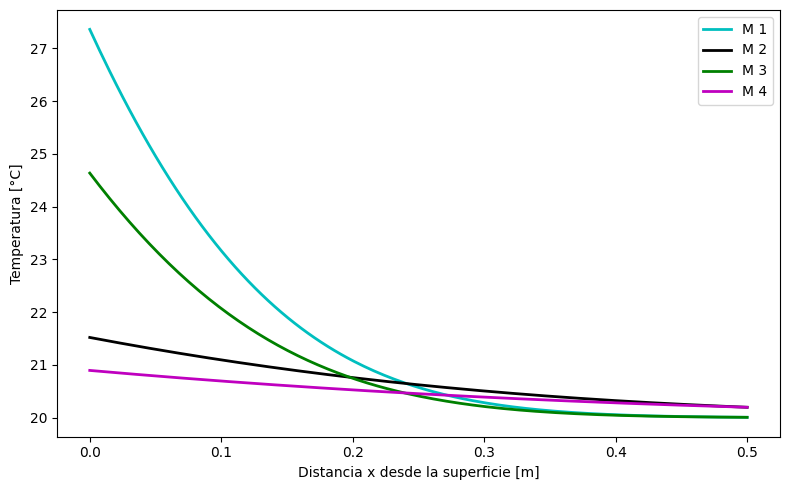

In [ ]:
# ----------------------------------------------------------
# Librerías
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
from scipy.special import erfc   # función complemento error

# ----------------------------------------------------------
# Datos del problema
# ----------------------------------------------------------
q_flux = 1250.0       # [W/m^2]
Ti = 20.0            # [°C]
t = 20 * 60.0        # [s]

# ----------------------------------------------------------
# Materiales: nombre, conductividad k [W/m·K], difusividad alpha [m^2/s]
# ----------------------------------------------------------
materials = [
    ('M 1',   23.0,   1.2e-5),
    ('M 2',  265.0,   6.81e-5),
    ('M 3',   38.0,   1.3e-5),
    ('M 4',  574.0,   1.11e-4)
]

# ----------------------------------------------------------
# Malla espacial
# ----------------------------------------------------------
x = np.linspace(0, 0.5, 200)   # [m]

colors = ['c', 'k', 'g', 'm']

# ----------------------------------------------------------
# Figura
# ----------------------------------------------------------
plt.figure(figsize=(8,5))

# Bucle sobre cada material
for i, (name, k, alpha) in enumerate(materials):

    # Solución analítica - Caso 2: flujo constante en superficie
    term1 = (2 * q_flux / k) * np.sqrt(alpha * t / pi) * np.exp(-x**2 / (4 * alpha * t))
    term2 = (q_flux * x / k) * erfc(x / (2 * np.sqrt(alpha * t)))
    T = Ti + term1 - term2

    Tsup = T[0]
    print(f"Ts en 20 min ({name}): {Tsup:.2f} °C")


    plt.plot(x, T, color=colors[i], linewidth=2, label=name)

# ----------------------------------------------------------
# grafica
# ----------------------------------------------------------
plt.xlabel('Distancia x desde la superficie [m]')
plt.ylabel('Temperatura [°C]')
#plt.title('Distribución de temperatura en sólido semi-infinito (t = 20 min)')
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()


## Ejemplo 6.5.

alpha = 1.154e-04 m^2/s
r = 0.0031 (<=0.5 para estabilidad en explícito)

Matriz A (explícito):
[[1.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.0031 0.9937 0.0031 0.     0.     0.     0.     0.    ]
 [0.     0.0031 0.9937 0.0031 0.     0.     0.     0.    ]
 [0.     0.     0.0031 0.9937 0.0031 0.     0.     0.    ]
 [0.     0.     0.     0.0031 0.9937 0.0031 0.     0.    ]
 [0.     0.     0.     0.     0.0031 0.9937 0.0031 0.    ]
 [0.     0.     0.     0.     0.     0.0031 0.9937 0.0031]
 [0.     0.     0.     0.     0.     0.     0.     1.    ]]
[30.   32.86 35.71 38.57 41.43 44.29 47.14 50.  ]

Resultados de temperatura en nodos:
        t=0s    t=5s   t=30s   t=60s
x [m]                               
0.000  30.00  502.00  502.00  502.00
0.043  32.86  143.92  317.71  370.04
0.086  35.71   51.14  179.12  255.30
0.129  38.57   40.06   99.12  168.40
0.171  41.43   41.54   63.13  110.92
0.214  44.29   44.29   50.97   77.52
0.257  47.14   47.14   48.86   59.98
0.300  50.0

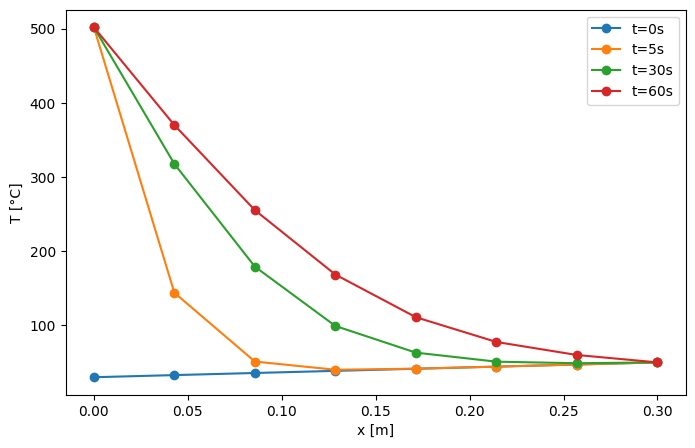

In [ ]:
    # ----------------------------------------------------------
    # Librerías
    # ----------------------------------------------------------
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

    # ----------------------------------------------------------
    # Propiedades
    # ----------------------------------------------------------
    k = 400.0       # [W/mK]
    rho = 9000.0    # [kg/m3]
    cp = 385.0      # [J/kg K]
    alpha = k / (rho * cp)


    L = 0.3        # longitud de la barra [m]
    Nx = 8         # Número de nodos
    dx = L / (Nx - 1) # espaciado entre nodos
    x = np.linspace(0, L, Nx)

    # ----------------------------------------------------------
    # Verificación estabilidad
    # ----------------------------------------------------------
    dt = 0.05
    t_final = 60.0
    nt = int(t_final / dt)

    r = alpha * dt / dx**2
    print(f"alpha = {alpha:.3e} m^2/s")
    print(f"r = {r:.4f} (<=0.5 para estabilidad en explícito)\n")

    # ----------------------------------------------------------
    # Matriz
    # ----------------------------------------------------------
    A = np.zeros((Nx, Nx))
    for i in range(1, Nx-1):
        A[i,i]   = 1 - 2*r
        A[i,i-1] = r
        A[i,i+1] = r
    # fronteras fijas
    A[0,:] = 0; A[0,0] = 1
    A[-1,:] = 0; A[-1,-1] = 1

    print("Matriz A (explícito):")
    print(np.round(A, 4))

    # condiciones iniciales
    T_izq_init = 30.0
    T_der = 50.0
    T_izq_new = 502.0

    # perfil inicial lineal
    T = T_izq_init + (T_der - T_izq_init) / L * x
    print(np.round(T, 2))


    tiempo_guard = [0, 5, 30, 60]
    guard = {t: None for t in tiempo_guard}
    guard[0] = T.copy()

    # ----------------------------------------------------------
    # Iteración temporal
    # ----------------------------------------------------------
    for n in range(1, nt+1):
        # multiplicación matricial
        T = A @ T
        # cfr
        T[0] = T_izq_new
        T[-1] = T_der
        current_t = n * dt
        if any(abs(current_t - ts) < dt/2 for ts in tiempo_guard):
            guard[int(current_t)] = T.copy()

     # ----------------------------------------------------------
    # Tabular y graficar
    # ----------------------------------------------------------
    df = pd.DataFrame({f"t={t}s": np.round(guard[t], 2) for t in tiempo_guard}, index=np.round(x,3))
    df.index.name = "x [m]"
    print("\nResultados de temperatura en nodos:")
    print(df)


    plt.figure(figsize=(8,5))
    for t in tiempo_guard:
        plt.plot(x, guard[t], marker="o", label=f"t={t}s")
    plt.xlabel("x [m]")
    plt.ylabel("T [°C]")
    #plt.title("Evolución de T(x,t) en la barra de cobre (Explícito)")
    plt.legend()
    plt.grid(False)
    plt.show()

## Ejemplo 6.6.

Fo = 2.7551


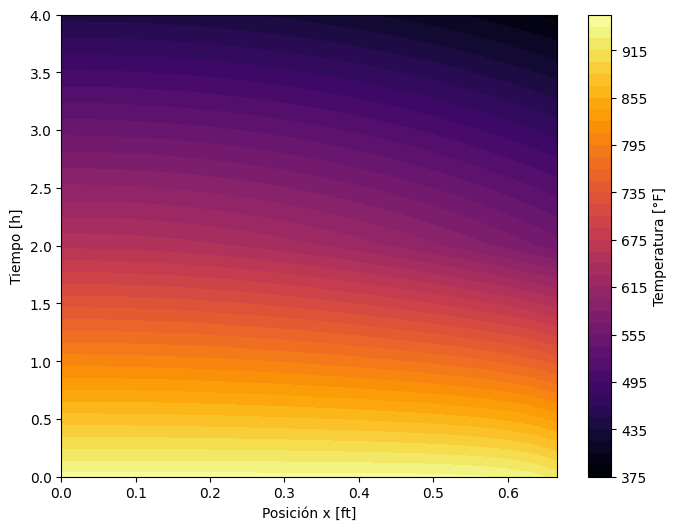

In [ ]:
    # ----------------------------------------------------------
    # Librerías
    # ----------------------------------------------------------
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    # ----------------------------------------------------------
    # propiedades
    # ----------------------------------------------------------
    e = 0.65                # emisividad
    k = 18.0                # [Btu/hr ft °F]
    Cp = 0.12               # [Btu/lb °F]
    rho = 490.0             # [lb/ft^3]
    sigma = 0.173e-8        # [Btu/hr·ft^2·R^4]

    Ts0 = 950            # [°F] (inicial)
    Tinf = 90.0             # [°F] (aire)

    # Conversión a Rankine para radiación
    def F_R(T_F):
        return T_F + 459.67

    # ----------------------------------------------------------
    # Geometría
    # ----------------------------------------------------------
    L = 8/12   # [ft]
    N = 21      # nodos
    dx = L/(N-1)

    dt = 0.01   # h
    alpha = k/(rho*Cp)
    Fo = alpha*dt/dx**2
    print(f"Fo = {Fo:.4f}")

    # ----------------------------------------------------------
    # Clculo de  coeficientes convectivo y radiativo
    # ----------------------------------------------------------
    hc = (Ts0 - Tinf)**0.25
    hr = sigma*e*((F_R(Ts0)**4 - F_R(Tinf)**4)/(Ts0 - Tinf))

    Bi_c = hc*(dx/k)
    Bi_r = hr*(dx/k)

    # ----------------------------------------------------------
    # Matriz
    # ----------------------------------------------------------
    A = np.zeros((N,N))

    for i in range(1,N-1):   # nodos internos
        A[i,i-1] = -Fo
        A[i,i]   = 1 + 2*Fo
        A[i,i+1] = -Fo

    # nodo izquierdo (adiabático)
    A[0,0] = 1 + 2*Fo
    A[0,1] = -2*Fo

    # nodo derecho (convección+rad)
    A[-1,-2] = -2*Fo
    A[-1,-1] = 1 + 2*Fo + 2*Fo*Bi_c + 2*Fo*Bi_r

    Ainv = np.linalg.inv(A)   # calculo de la matriz inversa

    # condición inicial
    T = np.ones(N)*Ts0

    # ----------------------------------------------------------
    # Iteración
    # ----------------------------------------------------------
    t_final = 4  # h
    nt = int(t_final/dt)

    T_guard = []
    tiempo = []

    for n in range(nt+1):
        b = T.copy()
        # corrección por frontera derecha
        b[-1] = T[-1] + (2*Fo*Bi_c + 2*Fo*Bi_r)*Tinf # ssiempre antes de hacer la multiplicación

        T = Ainv @ b

        if n % 200 == 0:   # guardar cada 200 pasos
            T_guard.append(T.copy())
            tiempo.append(n*dt)

    T_guard = np.array(T_guard)
    X, Y = np.meshgrid(np.linspace(0, L, N), tiempo)


    plt.figure(figsize=(8,6))
    plt.contourf(np.linspace(0, L, N), tiempo, T_guard, 50, cmap="inferno")
    plt.colorbar(label="Temperatura [°F]")
    plt.xlabel("Posición x [ft]")
    plt.ylabel("Tiempo [h]")
    #plt.title("Mapa de calor T(x,t)")
    plt.show()